In [1]:
# IMPORT LIBRARY

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [2]:
df = pd.read_csv(r'tesla.csv')
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

In [5]:
df.shape # 1692 rows and 7 columns that the data frame have

(1692, 6)

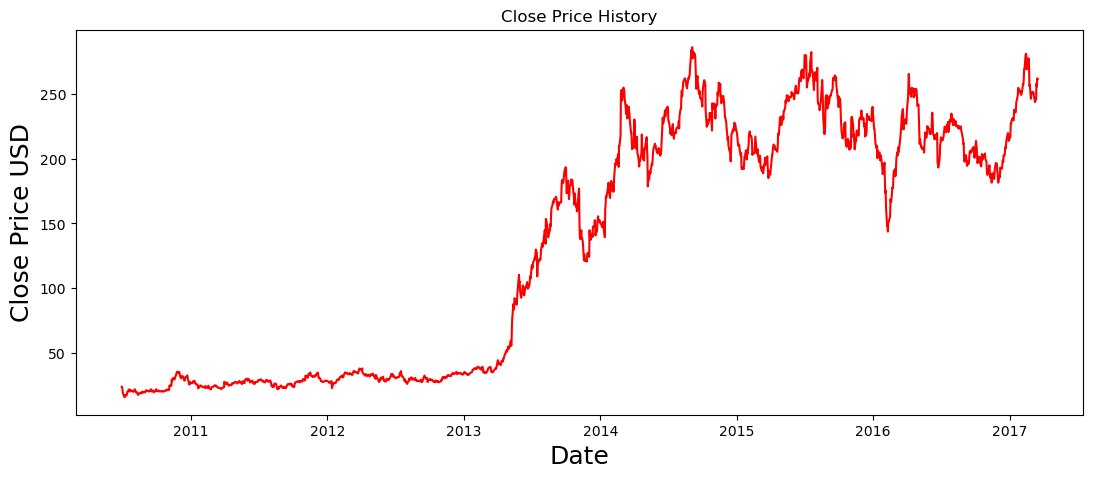

In [7]:
# Plotting the data 

plt.figure(figsize = (13, 5))
plt.title('Close Price History')
plt.plot(df['Close'], color = 'red')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [8]:
# Create new data frame with only 'Close column'ArithmeticError
data = df.filter(['Close'])
dataset = data.values # convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8) # number of rows to train the model on
training_data_len

1354

In [9]:
# Scale the data
scaler = MinMaxScaler(feature_range = (0, 11))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[ 0.32929983],
       [ 0.3268576 ],
       [ 0.25074003],
       ...,
       [ 9.76624433],
       [10.02349681],
       [10.00110979]])

In [10]:
# Create the training dataset 
# Create the scaled training dataset with

train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.32929983, 0.3268576 , 0.25074003, 0.13839554, 0.01261845,
       0.        , 0.06756952, 0.06512729, 0.05088066, 0.09524862,
       0.16444641, 0.1664816 , 0.19701002, 0.24870485, 0.18317047,
       0.1799141 , 0.2116637 , 0.22346806, 0.20962851, 0.19334661,
       0.20026638, 0.18520574, 0.16851691, 0.20840733, 0.25033307,
       0.22224688, 0.18927623, 0.15427027, 0.15467732, 0.13147576,
       0.08547957, 0.0732682 , 0.10257549, 0.12129962, 0.13636027,
       0.12089254, 0.12170667, 0.13432504, 0.17625069, 0.13839554,
       0.16688869, 0.160783  , 0.15874782, 0.16566759, 0.14979277,
       0.18927623, 0.21410593, 0.21369889, 0.19293964, 0.20759324,
       0.19985934, 0.17787892, 0.20026638, 0.21654829, 0.25155417,
       0.20922147, 0.18032119, 0.21410593, 0.20230165, 0.16566759])]
[0.15304909570218372]



In [11]:
# Convert the x_train and y_train to numpy arrays and
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1294, 60, 1)

In [13]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# Train the model 
model.fit(x_train, y_train, batch_size = 1, epochs = 10)

Epoch 1/10
1294/1294 [==============================] - 33s 22ms/step - loss: 0.5773
Epoch 2/10
1294/1294 [==============================] - 29s 23ms/step - loss: 0.1218
Epoch 3/10
1294/1294 [==============================] - 30s 23ms/step - loss: 0.1026
Epoch 4/10
1294/1294 [==============================] - 29s 22ms/step - loss: 0.0683
Epoch 5/10
1294/1294 [==============================] - 32s 25ms/step - loss: 0.0927
Epoch 6/10
1294/1294 [==============================] - 28s 22ms/step - loss: 0.0623
Epoch 7/10
1294/1294 [==============================] - 28s 22ms/step - loss: 0.0689
Epoch 8/10
1294/1294 [==============================] - 29s 23ms/step - loss: 0.0715
Epoch 9/10
1294/1294 [==============================] - 28s 22ms/step - loss: 0.0653
Epoch 10/10
1294/1294 [==============================] - 28s 22ms/step - loss: 0.0524


In [19]:
# Create the testing data sets
# Create a new array containing scale from index 1543 to 2003

test_data = scaled_data[training_data_len-60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [21]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [22]:
# Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(338, 60, 1)

In [23]:
# Predicting the data 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 1s 16ms/step


In [25]:
# Get he root mean square error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.74506590032995

C:\Users\Admin\AppData\Local\Temp\ipykernel_7284\505254361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


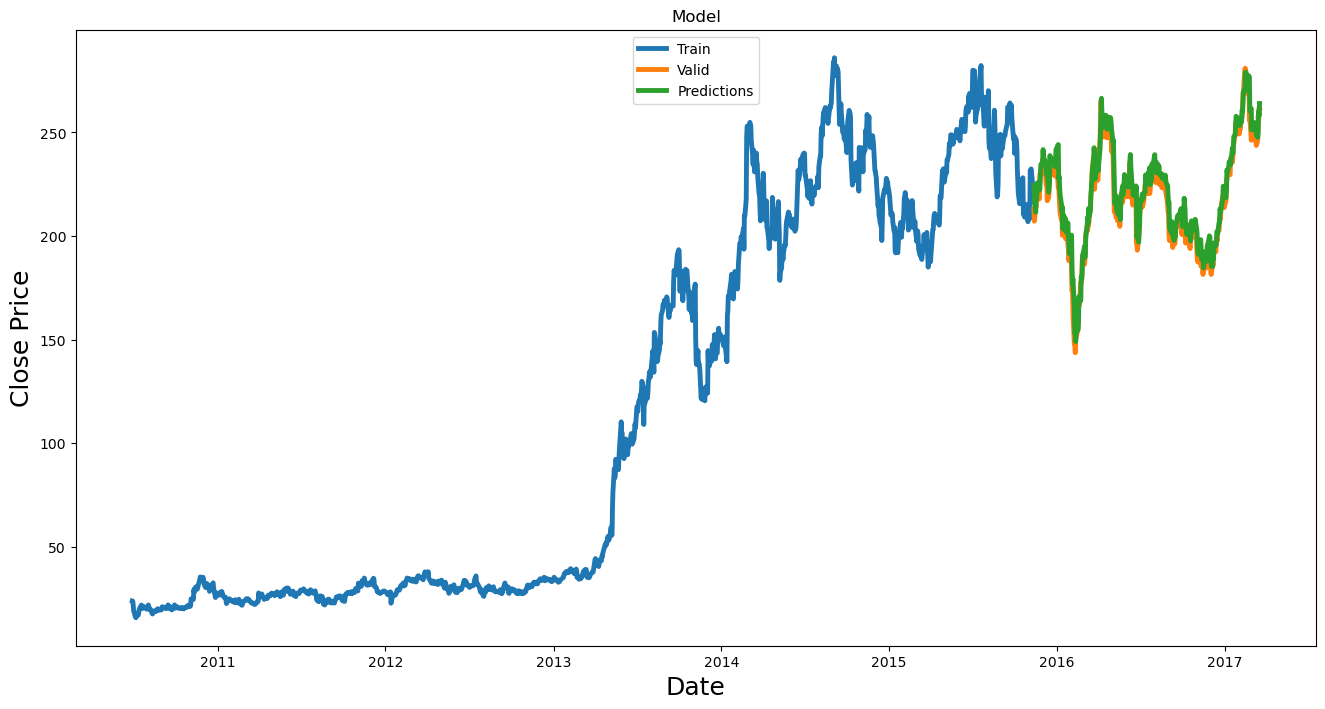

In [30]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper center')

In [31]:
valid

,Close,Predictions
Date,,
2015-11-12,212.940002,224.427628
2015-11-13,207.190002,217.369751
2015-11-16,214.309998,211.476517
2015-11-17,214.000000,219.213364
2015-11-18,221.070007,217.983948
...,...,...
2017-03-13,246.169998,247.583572
2017-03-14,258.000000,249.886612
2017-03-15,255.729996,260.340485


In [33]:
#get the quote
tesla_quote = pd.read_csv(r'tesla.csv')
#Create new data frame
new_df = tesla_quote.filter(['Close'])
#get the last 60 days closing price values and convert the data frame to an array
last_60_days = new_df[-60:].values
#scaled the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days 
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#get the predicted scaled price
pred_price= model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
pred_price

1/1 [==============================] - 0s 39ms/step


array([[263.3781]], dtype=float32)